# Visualise the observation time series

In [1]:
import myanalysis.visualise

In [2]:
help(myanalysis.visualise.plot_time_series)

Help on function plot_time_series in module myanalysis.visualise:

plot_time_series(working_dir: str, rainfall_filename: str = None, pet_filename: str = None, streamflow_filename: str = None, piezo_level_filename: str = None, plot_filename: str = None, rainfall_info: str = None, pet_info: str = None, streamflow_info: str = None, piezo_level_info: str = None, fig_size: tuple = None, start: str = None, end: str = None, rainfall_secondary_frequency: str = None, pet_secondary_frequency: str = None) -> None
    Plot the observations time series against one another in a single
    figure.
    
    :Parameters:
    
        working_dir: `str`
            The path to the working directory where the data is stored
            in the 'data' subdirectory.
    
        rainfall_filename: `str`, optional
            The name of the file containing the rainfall data. If not
            provided, no rainfall data will be plotted.
    
        pet_filename: `str`, optional
            The name of the 

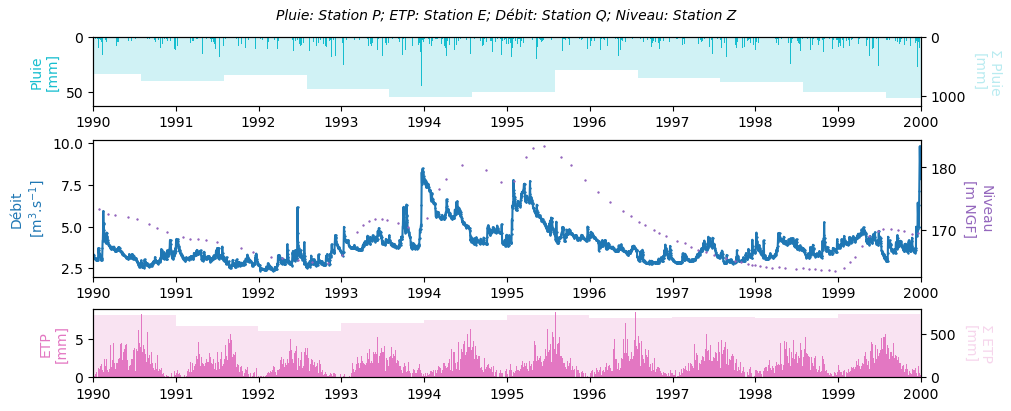

In [3]:
myanalysis.visualise.plot_time_series(
    working_dir='../../examples/my-example',
    rainfall_filename='pluie.prn',
    pet_filename='etp.prn',
    streamflow_filename='debit.prn',
    piezo_level_filename='niveau.prn',
    rainfall_info='Station P',
    pet_info='Station E',
    streamflow_info='Station Q',
    piezo_level_info='Station Z',
    rainfall_secondary_frequency='A-JUL',
    pet_secondary_frequency='A',
    start='1990-01-01', end='2000-01-01'
)

# Compute correlation between the observation time series

In [4]:
import myanalysis.compare

In [5]:
help(myanalysis.compare.compute_correlation_matrix)

Help on function compute_correlation_matrix in module myanalysis.compare:

compute_correlation_matrix(correlation_coefficient: str, working_dir: str, rainfall_filename: str = None, pet_filename: str = None, streamflow_filename: str = None, piezo_level_filename: str = None) -> pandas.core.frame.DataFrame
    Compute the correlation between the given observations time series.
    
    :Parameters:
    
        correlation_coefficient: `str`
            The correlation coefficient to use. It can either be 'pearson'
             or 'spearman'.
    
        working_dir: `str`
            The file path the working directory where the data is stored
            in the 'data' subdirectory.
    
        rainfall_filename: `str`, optional
            The name of the file containing the rainfall data. If not
            provided, no rainfall data entry will be included in the
            returned correlation matrix.
    
        pet_filename: `str`, optional
            The name of the file conta

In [6]:
myanalysis.compare.compute_correlation_matrix(
    correlation_coefficient='pearson',
    working_dir='../../examples/my-example',
    rainfall_filename='pluie.prn',
    pet_filename='etp.prn',
    streamflow_filename='debit.prn',
    piezo_level_filename='niveau.prn'
)

,P,ETP,Q,Z
P,1.000000,-0.125141,0.100377,0.037956
ETP,-0.125141,1.000000,-0.023771,0.120732
Q,0.100377,-0.023771,1.000000,0.701150
Z,0.037956,0.120732,0.701150,1.000000


# Track the evolution between versions

## Visualise the simulations

In [7]:
import myanalysis.track

In [8]:
help(myanalysis.track.plot_simulation_history)

Help on function plot_simulation_history in module myanalysis.track:

plot_simulation_history(variable: str, history_dir: str, plot_filename: str = None, fig_size: tuple = None) -> None
    Plot the evolution of the simulation time series for a given
    variable between the different version iterations.
    
    :Parameters:
    
        variable: `str`
            The model variable to display. It can either be
            'streamflow' or 'piezo_level'.
    
        history_dir: `str`
            The path to the history directory containing a collection
            of subdirectories that are independent working directories
            (i.e. they follow the config/data/output internal structure).
            The working directories must be named following the convention
            V#, where # is a number starting from 0, and going with
            integer increments.
    
            See below the structure and naming conventions that the
            history directory must follow:
  

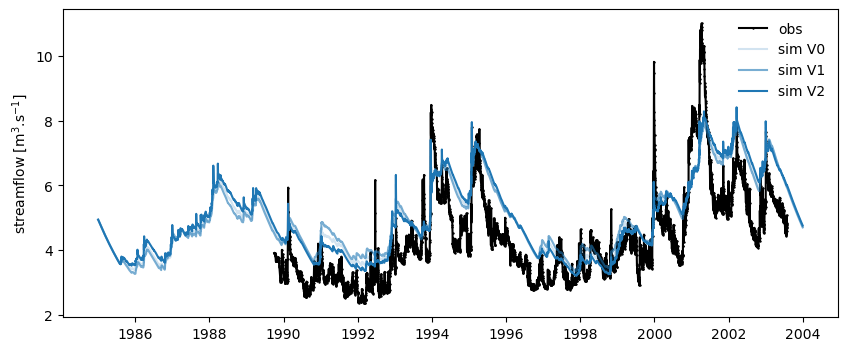

In [9]:
myanalysis.track.plot_simulation_history(
    variable='streamflow',
    history_dir='../../examples/my-example-2'
)

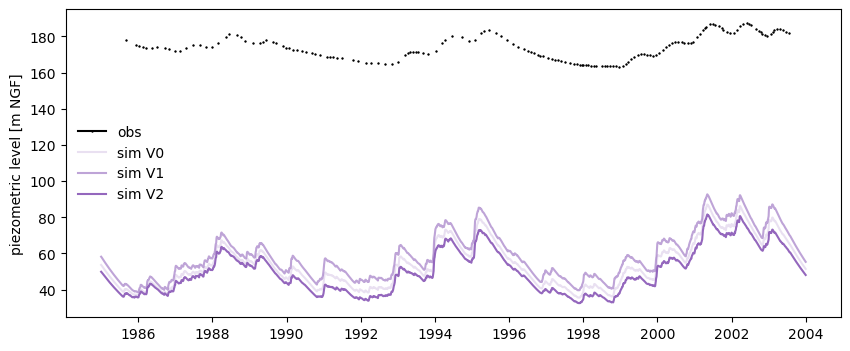

In [10]:
myanalysis.track.plot_simulation_history(
    variable='piezo_level',
    history_dir='../../examples/my-example-2'
)

# Compare the performances

In [11]:
help(myanalysis.track.collect_performance_history)

Help on function collect_performance_history in module myanalysis.track:

collect_performance_history(history_dir: str) -> pandas.core.frame.DataFrame
    Gather the evolution of the simulation performances between the
    different version iterations.
    
    :Parameters:
    
        history_dir: `str`
            The path to the history directory containing a collection
            of subdirectories that are independent working directories
            (i.e. they follow the config/data/output internal structure).
            The working directories must be named following the convention
            V#, where # is a number starting from 0, and going with
            integer increments.
    
            See below the structure and naming conventions that the
            history directory must follow:
    
                <history_dir>
                ├── V0
                │   ├── config
                │   ├── data
                │   └── output
                ├── V1
               

In [12]:
myanalysis.track.collect_performance_history(
    history_dir='../../examples/my-example-2'
)

,Nash_Q_Nat,Nash_Q_Pon,Nash_Niveau,Nash_Global,R_Global,Nash_Q_Racin,Nash_Q_Logar,Nash_Q_Inver,R_Déb_Nat,R_Déb_Pond,R_Niveau,R_Déb_Racin,R_Déb_Logar,R_Déb_Inver,Biais_m3s,Biais_%,Biais_%_Abs,Biais_Rapp,Biais/Ety_%
V0,0.4086,0.4086,-260.025,-17.228,-4.151,0.3977,0.3773,0.3102,0.6392,0.6392,-16.125,0.6307,0.6143,0.5569,0.7665,16.264,16.264,1.177,57.735
V1,0.3871,0.3871,-238.012,-15.709,-3.963,0.3594,0.3220,0.2259,0.6222,0.6222,-15.428,0.5995,0.5674,0.4753,0.8058,17.025,17.025,1.186,62.603
V2,0.4158,0.4158,-279.483,-18.627,-4.316,0.4197,0.4147,0.3754,0.6448,0.6448,-16.718,0.6478,0.6440,0.6127,0.7276,15.502,15.502,1.168,53.485


## Compare the parameter values

In [13]:
help(myanalysis.track.collect_parameters_history)

Help on function collect_parameters_history in module myanalysis.track:

collect_parameters_history(history_dir: str) -> pandas.core.frame.DataFrame
    Gather the evolution of the model parameter values between the
    different version iterations.
    
    :Parameters:
    
        history_dir: `str`
            The path to the history directory containing a collection
            of subdirectories that are independent working directories
            (i.e. they follow the config/data/output internal structure).
            The working directories must be named following the convention
            V#, where # is a number starting from 0, and going with
            integer increments.
    
            See below the structure and naming conventions that the
            history directory must follow:
    
                <history_dir>
                ├── V0
                │   ├── config
                │   ├── data
                │   └── output
                ├── V1
                │ 

In [14]:
myanalysis.track.collect_parameters_history(
    history_dir='../../examples/my-example-2'
)

,Superfic_Cor,Superfi_Fich,Débit_extér,Coef_Emmag,Niv_Base,Corr_Pluv,Corr_ETP,Rsup_Rumax,Rsup_Progr,Rui_Perco,...,Seuil_Débor,T1/2_Débor,Max_T1/2_Rui,Corr_Superf,F_Pomp_Riv,Tr_Pomp_Riv,Ts_Pomp_Riv,F_Pomp_Nap,Tr_Pomp_Nap,Ts_Pomp_Nap
,km2,km2,m3/s,%,m,%,%,mm,mm,mm,...,mm,pas_temps,mois,(-),-,mois,mois,-,mois,mois
V0,524.0,524.0,0.0,1.0,0.0,0.0,0.0,0.0,173.795,3002.846,...,0.0,0.05,0.0001,1.0,,,,,,
V1,484.0,484.0,0.0,1.0,0.0,0.0,0.0,0.0,107.745,8010.352,...,0.0,0.05,0.0001,1.0,,,,,,
V2,564.0,564.0,0.0,1.0,0.0,0.0,0.0,0.0,260.033,1881.625,...,0.0,0.05,0.0001,1.0,,,,,,
